### 1. Read Data

In [1]:
# Imports
import pandas as pd

# Read in 2 Data Files and Combine, Mark as M/F
female_data = pd.read_csv('../Data/file_list_female_parsed_with_data.csv')
male_data = pd.read_csv('../Data/file_list_male_parsed_with_data.csv')
female_data['gender'] = 0  # Female data is 0
male_data['gender'] = 1    # Male data is 1
combined_data = pd.concat([female_data, male_data], ignore_index=True)
# combined_data.to_csv('combined_dataset.csv', index=False)
print(combined_data.shape)
print(combined_data.head())

(1001966, 17)
                experiment_name video_base_name  track_id  count_uncalibrated  \
0  MC_singlenuc23_1_Tk33_021220        0001_vid      1330                   0   
1  MC_singlenuc23_1_Tk33_021220        0001_vid      1330                   1   
2  MC_singlenuc23_1_Tk33_021220        0001_vid      1330                  10   
3  MC_singlenuc23_1_Tk33_021220        0001_vid      1330                 100   
4  MC_singlenuc23_1_Tk33_021220        0001_vid      1330                1000   

   new_count_uncalibrated          xc          yc     u_dot      v_dot  \
0                  382058  117.405639  104.372970  6.973857  22.796302   
1                  382059  123.302195  123.913192  6.585702  21.623125   
2                  382068  111.683189  400.633206 -0.382109  28.731078   
3                  382158  821.635502  527.801237  5.468046  -3.778739   
4                  383058  883.833486  309.388663  2.265553   0.529649   

         s_dot  class_id   p_value  track_length      

In [2]:
# Rename Data
data = combined_data

# Create Unique Identifier
data['id'] = data['experiment_name'] + '__' + data['video_base_name'] + '__' + data['track_id'].astype(str)

# Save Class ID for Later Comparison
class_id_array = data[['gender', 'id']].copy()

# Drop Potential Labels
data.drop('gender', inplace=True, axis=1) 

# Drop Cols that We Might Need
data.drop('w', inplace=True, axis=1) 
data.drop('h', inplace=True, axis=1) 
data.drop('s_dot', inplace=True, axis=1) 
data.drop('p_value', inplace=True, axis=1) 
data.drop('track_id', inplace=True, axis=1) 
data.drop('class_id', inplace=True, axis=1)
data.drop('track_length', inplace=True, axis=1) 
data.drop('experiment_name', inplace=True, axis=1) 
data.drop('video_base_name', inplace=True, axis=1) 
data.drop('count_uncalibrated', inplace=True, axis=1) 
data.drop('new_count_uncalibrated', inplace=True, axis=1) 

# Remove Requested IDs
print(data.shape)
ids_to_remove = [
    'MC_singlenuc23_8_Tk33_031720__0001_vid__2488',
    'MC_singlenuc24_4_Tk47_030320__0002_vid__3426',
    'MC_singlenuc35_11_Tk61_051220__0002_vid__1635',
    'MC_singlenuc35_11_Tk61_051220__0002_vid__3257',
    'MC_singlenuc35_11_Tk61_051220__0002_vid__45',
    'MC_singlenuc35_11_Tk61_051220__0002_vid__622',
    'MC_singlenuc41_2_Tk9_030920__0001_vid__5076',
    'MC_singlenuc43_11_Tk41_060220__0001_vid__296',
    'MC_singlenuc45_7_Tk47_050720__0002_vid__2524',
    'MC_singlenuc55_2_Tk47_051220__0001_vid__1093',
    'MC_singlenuc59_4_Tk61_060220__0001_vid__3510',
    'MC_singlenuc59_4_Tk61_060220__0001_vid__5827',
    'MC_singlenuc76_3_Tk47_072920__0001_vid__1007',
    'MC_singlenuc96_b1_Tk41_081120__0001_vid__6696',
    'MC_singlenuc96_b1_Tk41_081120__0001_vid__8437',
    'MC_singlenuc96_b1_Tk41_081120__0001_vid__8641',
    'MC_singlenuc96_b1_Tk41_081120__0001_vid__8792',
    'MC_singlenuc96_b1_Tk41_081120__0001_vid__8893'
]
data = data[~data['id'].isin(ids_to_remove)]
class_id_array = class_id_array[~class_id_array['id'].isin(ids_to_remove)]
print(data.shape)

# Check Modified Data
print("Modified CSV Data: \n") 
print(data)

# Rename DF
df = data

(1001966, 6)
(985890, 6)
Modified CSV Data: 

                 xc          yc     u_dot      v_dot   frame  \
0        117.405639  104.372970  6.973857  22.796302  382058   
1        123.302195  123.913192  6.585702  21.623125  382059   
2        111.683189  400.633206 -0.382109  28.731078  382068   
3        821.635502  527.801237  5.468046  -3.778739  382158   
4        883.833486  309.388663  2.265553   0.529649  383058   
...             ...         ...       ...        ...     ...   
1001961  156.276651  671.360475  4.437002   6.482767  537123   
1001962  162.206921  672.395285  4.571728   5.991240  537124   
1001963  170.841343  672.257588  4.938269   5.438280  537125   
1001964  178.862178  673.323482  5.216379   5.043803  537126   
1001965  187.945173  674.862680  5.565223   4.727619  537127   

                                                    id  
0         MC_singlenuc23_1_Tk33_021220__0001_vid__1330  
1         MC_singlenuc23_1_Tk33_021220__0001_vid__1330  
2         MC_s

In [3]:
# Add in Labels
# print(class_id_array.tail())
averaged_class_id = class_id_array.groupby('id')['gender'].mean().round().astype(int).reset_index()
averaged_class_id = averaged_class_id.rename(columns={'id': 'id2'})
print(averaged_class_id)

                                               id2  gender
0     MC_singlenuc23_1_Tk33_021220__0001_vid__1330       0
1     MC_singlenuc23_1_Tk33_021220__0001_vid__1573       0
2     MC_singlenuc23_1_Tk33_021220__0001_vid__1640       0
3     MC_singlenuc23_1_Tk33_021220__0001_vid__1748       0
4     MC_singlenuc23_1_Tk33_021220__0001_vid__2085       0
..                                             ...     ...
648   MC_singlenuc96_b1_Tk41_081120__0001_vid__873       0
649   MC_singlenuc96_b1_Tk41_081120__0001_vid__877       1
650  MC_singlenuc96_b1_Tk41_081120__0001_vid__9161       0
651  MC_singlenuc96_b1_Tk41_081120__0001_vid__9345       0
652  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350       1

[653 rows x 2 columns]


### 2. Combine Frames by Track & Create Features

In [4]:
# Imports
import numpy as np

In [5]:
# Engineered Features
def calculate_speed(df):
    df['speed'] = np.sqrt(df['u_dot']**2 + df['v_dot']**2)
    return df

def calculate_outreach_ratio(df):
    start_x, start_y = df.iloc[0][['xc', 'yc']]
    end_x, end_y = df.iloc[-1][['xc', 'yc']]
    displacement = np.sqrt((end_x - start_x)**2 + (end_y - start_y)**2)
    path_length = df['speed'].sum()
    outreach_ratio = displacement / path_length if path_length != 0 else 0
    return outreach_ratio

def calculate_acceleration(u_dot, v_dot, time_intervals):
    u_dot = np.array(u_dot)
    v_dot = np.array(v_dot)
    time_intervals = np.array(time_intervals)
    ax = np.diff(u_dot) / time_intervals[:-1]
    ay = np.diff(v_dot) / time_intervals[:-1]
    acceleration = np.sqrt(ax**2 + ay**2)
    return ax, ay, acceleration

def calculate_distance_traveled(xc, yc):
    xc = np.array(xc)
    yc = np.array(yc)
    dx = np.diff(xc)
    dy = np.diff(yc)
    distances = np.sqrt(dx**2 + dy**2)
    distance_traveled = np.sum(distances)
    return distance_traveled

In [6]:
# Create Features from TrackID
features = []
grouped = data.groupby('id')

for track_id, group in grouped:
    group = group.sort_values(by='frame')
    speed = calculate_speed(group)['speed'].mean()
    outreach_ratio = calculate_outreach_ratio(group)
    time_intervals = group['frame'].diff().fillna(1).values  # Assume frame difference as time interval
    ax, ay, acceleration = calculate_acceleration(group['u_dot'], group['v_dot'], time_intervals)
    mean_acceleration = np.mean(acceleration)
    distance_traveled = calculate_distance_traveled(group['xc'], group['yc'])
    features.append({
        'id': track_id,
        'speed': speed,
        'outreach_ratio': outreach_ratio,
        'mean_acceleration': mean_acceleration,
        'distance_traveled': distance_traveled
    })

features_df = pd.DataFrame(features)
print(features_df.tail())

                                                id     speed  outreach_ratio  \
648   MC_singlenuc96_b1_Tk41_081120__0001_vid__873  0.746466        0.234327   
649   MC_singlenuc96_b1_Tk41_081120__0001_vid__877  4.584189        0.080949   
650  MC_singlenuc96_b1_Tk41_081120__0001_vid__9161  1.225791        0.143379   
651  MC_singlenuc96_b1_Tk41_081120__0001_vid__9345  2.434414        0.081309   
652  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350  5.231545        0.056981   

     mean_acceleration  distance_traveled  
648           0.187829        1861.253453  
649           0.576347        2374.990027  
650           0.143933        5789.845947  
651           0.216220        4567.240841  
652           0.443116        1972.812041  


In [7]:
# Create DF to Compare to Labels
combined_df = pd.concat([features_df, averaged_class_id], axis=1)
comparison_df = combined_df.drop(columns=['id2'])
comparison_df = comparison_df.rename(columns={'gender': 'is_male'})
print(comparison_df)

# Tally Males and Females
tally = comparison_df['is_male'].value_counts()
print(tally)

                                                id     speed  outreach_ratio  \
0     MC_singlenuc23_1_Tk33_021220__0001_vid__1330  2.669734        0.086335   
1     MC_singlenuc23_1_Tk33_021220__0001_vid__1573  2.306083        0.027860   
2     MC_singlenuc23_1_Tk33_021220__0001_vid__1640  2.884547        0.032662   
3     MC_singlenuc23_1_Tk33_021220__0001_vid__1748  2.867001        0.088994   
4     MC_singlenuc23_1_Tk33_021220__0001_vid__2085  2.646049        0.021937   
..                                             ...       ...             ...   
648   MC_singlenuc96_b1_Tk41_081120__0001_vid__873  0.746466        0.234327   
649   MC_singlenuc96_b1_Tk41_081120__0001_vid__877  4.584189        0.080949   
650  MC_singlenuc96_b1_Tk41_081120__0001_vid__9161  1.225791        0.143379   
651  MC_singlenuc96_b1_Tk41_081120__0001_vid__9345  2.434414        0.081309   
652  MC_singlenuc96_b1_Tk41_081120__0001_vid__9350  5.231545        0.056981   

     mean_acceleration  distance_travel

### 3. Split Data

In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(comparison_df, test_size=0.1, random_state=42)
print(train_df.shape)
print(test_df.shape)

(587, 6)
(66, 6)


### 4. Cluster Data for Additional Feature Based on Training

In [9]:
# This cell is to prevent the KMeans memory leak on Windows with MKL.
import os
os.environ['OMP_NUM_THREADS'] = '3'

In [10]:
# Imports
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

In [11]:
# Data
data = train_df.drop(columns=['is_male', 'id'])
print(data)

        speed  outreach_ratio  mean_acceleration  distance_traveled
577  5.685658        0.091999           0.359992        2120.843568
633  1.284351        0.277433           0.199595         904.329060
357  1.357269        0.204141           0.130170        4665.668347
165  4.808747        0.101014           0.418331        8253.542556
611  3.796143        0.029767           0.380977        3060.875314
..        ...             ...                ...                ...
71   4.469454        0.203392           0.302483        2615.042270
106  6.848159        0.132124           0.575422        9637.132413
270  3.656903        0.747736           0.223323        1204.035349
435  5.095371        0.219034           0.498550        5763.261859
102  3.889388        0.408020           0.327125        2084.076719

[587 rows x 4 columns]


In [12]:
# Update Var Name
X_train = data

C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(
C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(


Silhouette Score for 2 clusters: 0.6502230609175228
Silhouette Score for 3 clusters: 0.6249706563654032


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(
C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(
C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(


Silhouette Score for 4 clusters: 0.5720930550651053
Silhouette Score for 5 clusters: 0.5541501907701223
Silhouette Score for 6 clusters: 0.5358279449086989


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(
C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(


Silhouette Score for 7 clusters: 0.5421140455155633
Silhouette Score for 8 clusters: 0.5292076353714285


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(
C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(


Silhouette Score for 9 clusters: 0.5303864866060053
Silhouette Score for 10 clusters: 0.553043427296282


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(
C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(


Silhouette Score for 11 clusters: 0.5457261140381768
Silhouette Score for 12 clusters: 0.5507603728491853
Best number of clusters based on Silhouette Score: 2


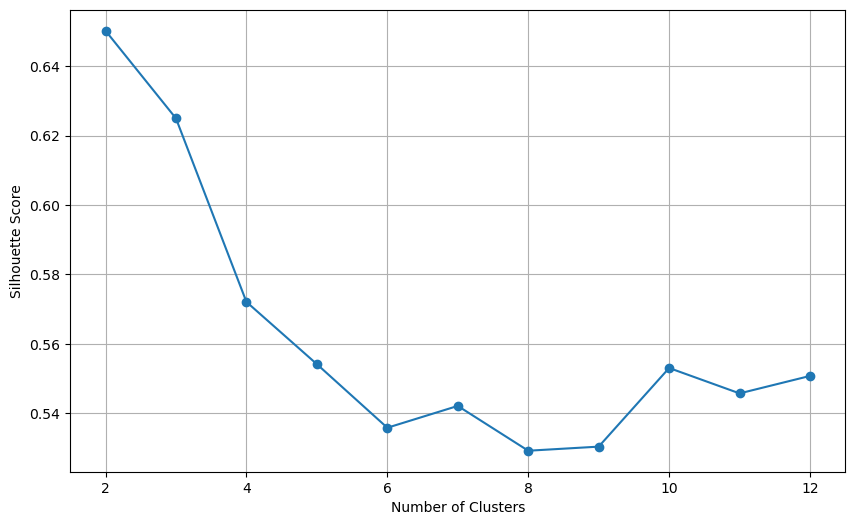

In [13]:
best_score = -1
best_num_clusters = None
silhouette_scores = []
num_clusters_list = []

for i in range(2, 13):
    bch = MiniBatchKMeans(n_clusters=i)
    labels = bch.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, labels, metric='euclidean')
    print("Silhouette Score for " + str(i) + " clusters:", silhouette_avg)
    silhouette_scores.append(silhouette_avg)
    num_clusters_list.append(i)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_num_clusters = i

print("Best number of clusters based on Silhouette Score:", best_num_clusters)

plt.figure(figsize=(10, 6))
plt.plot(num_clusters_list, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [14]:
# Cluster
MiniBatchKMeans = MiniBatchKMeans(n_clusters = 10)
MiniBatchKMeans = MiniBatchKMeans.fit(data.values)
labels = MiniBatchKMeans.predict(data.values)
data['cluster'] = MiniBatchKMeans.fit_predict(data)

# Check Clusters
print(data.tail())

        speed  outreach_ratio  mean_acceleration  distance_traveled  cluster
71   4.469454        0.203392           0.302483        2615.042270        2
106  6.848159        0.132124           0.575422        9637.132413        9
270  3.656903        0.747736           0.223323        1204.035349        6
435  5.095371        0.219034           0.498550        5763.261859        0
102  3.889388        0.408020           0.327125        2084.076719        6


C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(
C:\Users\kaiwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(


C:\Users\kaiwi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


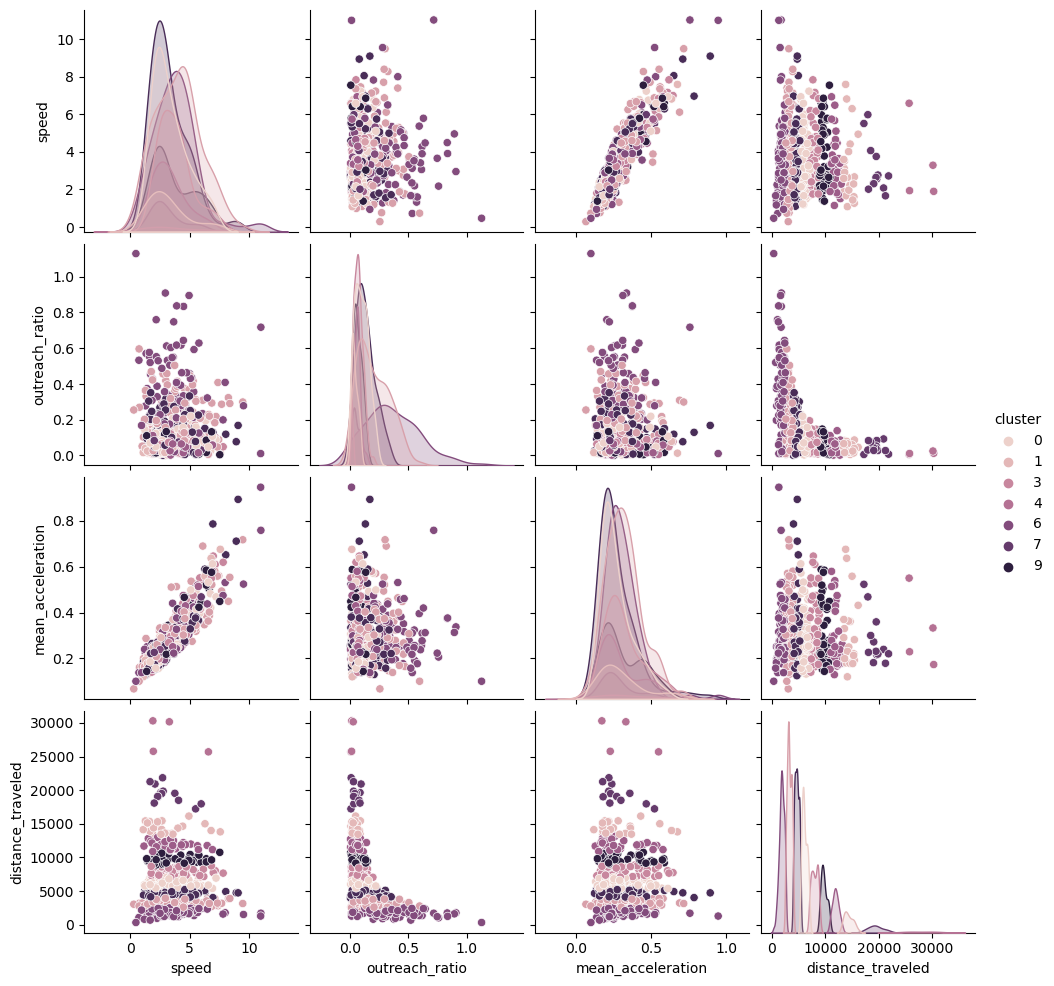

In [15]:
# Pair Plot
sns.pairplot(data, hue='cluster', diag_kind='kde')
plt.show()

In [16]:
# Check Data
print(data)

        speed  outreach_ratio  mean_acceleration  distance_traveled  cluster
577  5.685658        0.091999           0.359992        2120.843568        6
633  1.284351        0.277433           0.199595         904.329060        6
357  1.357269        0.204141           0.130170        4665.668347        8
165  4.808747        0.101014           0.418331        8253.542556        3
611  3.796143        0.029767           0.380977        3060.875314        2
..        ...             ...                ...                ...      ...
71   4.469454        0.203392           0.302483        2615.042270        2
106  6.848159        0.132124           0.575422        9637.132413        9
270  3.656903        0.747736           0.223323        1204.035349        6
435  5.095371        0.219034           0.498550        5763.261859        0
102  3.889388        0.408020           0.327125        2084.076719        6

[587 rows x 5 columns]


In [17]:
# Add Real Label
data = pd.merge(data, train_df[['is_male', 'id']], left_index=True, right_index=True)
print(data)
#data.to_csv('5_Features_with_ID_90_Percent_Disinclude_IDs.csv', index=False)

        speed  outreach_ratio  mean_acceleration  distance_traveled  cluster  \
577  5.685658        0.091999           0.359992        2120.843568        6   
633  1.284351        0.277433           0.199595         904.329060        6   
357  1.357269        0.204141           0.130170        4665.668347        8   
165  4.808747        0.101014           0.418331        8253.542556        3   
611  3.796143        0.029767           0.380977        3060.875314        2   
..        ...             ...                ...                ...      ...   
71   4.469454        0.203392           0.302483        2615.042270        2   
106  6.848159        0.132124           0.575422        9637.132413        9   
270  3.656903        0.747736           0.223323        1204.035349        6   
435  5.095371        0.219034           0.498550        5763.261859        0   
102  3.889388        0.408020           0.327125        2084.076719        6   

     is_male                           

### 5. Cluster Testing Data for Future Use

In [18]:
# Check Test Data
print(test_df)

                                               id     speed  outreach_ratio  \
109  MC_singlenuc34_3_Tk43_030320__0001_vid__5339  3.427861        0.199292   
274  MC_singlenuc45_7_Tk47_050720__0002_vid__3868  2.358489        0.112493   
199   MC_singlenuc40_2_Tk3_030920__0001_vid__3337  2.650354        0.285453   
429   MC_singlenuc65_4_Tk9_072920__0002_vid__1427  5.451525        0.048889   
447   MC_singlenuc65_4_Tk9_072920__0002_vid__6651  5.809478        0.044468   
..                                            ...       ...             ...   
334   MC_singlenuc56_2_Tk65_051220__0003_vid__416  2.592307        0.232560   
291  MC_singlenuc55_2_Tk47_051220__0001_vid__2620  2.101094        0.073558   
236   MC_singlenuc41_2_Tk9_030920__0001_vid__4852  1.670250        0.182483   
44    MC_singlenuc23_8_Tk33_031720__0001_vid__494  3.275614        0.232256   
81   MC_singlenuc28_1_Tk3_022520__0003_vid__23531  1.713950        0.082322   

     mean_acceleration  distance_traveled  is_male 

In [19]:
# Remove Track ID and Cluster
features_df = test_df
features_df_no_track_id = features_df.drop('id', axis=1)
features_df_no_track_id = features_df_no_track_id.drop('is_male', axis=1)
print(features_df_no_track_id)
predicted_clusters = MiniBatchKMeans.predict(features_df_no_track_id)

# Add to DF
features_df = features_df.assign(predicted_clusters=predicted_clusters)
test_df_prepared = features_df
print(test_df_prepared)
#test_df_prepared.to_csv('5_Features_with_ID_90_Percent_Disinclude_IDs_TEST.csv', index=False)

        speed  outreach_ratio  mean_acceleration  distance_traveled
109  3.427861        0.199292           0.377195        1387.612405
274  2.358489        0.112493           0.185607        3424.388132
199  2.650354        0.285453           0.206539        3833.747829
429  5.451525        0.048889           0.503387       13601.221454
447  5.809478        0.044468           0.541134       21557.168150
..        ...             ...                ...                ...
334  2.592307        0.232560           0.218279        5159.751257
291  2.101094        0.073558           0.230155        6403.468278
236  1.670250        0.182483           0.151172        5081.713539
44   3.275614        0.232256           0.340647        2869.981473
81   1.713950        0.082322           0.182981        4707.349631

[66 rows x 4 columns]
                                               id     speed  outreach_ratio  \
109  MC_singlenuc34_3_Tk43_030320__0001_vid__5339  3.427861        0.199292   
274

In [20]:
# Looks like Some Predictive Power Here
# Cluster = 7 is 93.62% likely to be a female.
# Cluster = 2 is 80.49% likely to be a female.
# Let's save clustering algorithm to joblib file.
import joblib

# num_features_gm = gm.n_features_in_
# print(num_features_gm)
# joblib.dump(birch, 'gaussian_mixture_model_disincludeIDs.pkl')
# joblib.dump(labels, 'labels_disincludeIDs.pkl')

### 6. Use Basic DT

In [21]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score

In [22]:
# Check Train Data
train_data = data
print(train_data)

        speed  outreach_ratio  mean_acceleration  distance_traveled  cluster  \
577  5.685658        0.091999           0.359992        2120.843568        6   
633  1.284351        0.277433           0.199595         904.329060        6   
357  1.357269        0.204141           0.130170        4665.668347        8   
165  4.808747        0.101014           0.418331        8253.542556        3   
611  3.796143        0.029767           0.380977        3060.875314        2   
..        ...             ...                ...                ...      ...   
71   4.469454        0.203392           0.302483        2615.042270        2   
106  6.848159        0.132124           0.575422        9637.132413        9   
270  3.656903        0.747736           0.223323        1204.035349        6   
435  5.095371        0.219034           0.498550        5763.261859        0   
102  3.889388        0.408020           0.327125        2084.076719        6   

     is_male                           

In [23]:
# Check Test Data
test_data = test_df_prepared
test_data = test_data.rename(columns={'predicted_clusters': 'cluster'})
print(test_data)

                                               id     speed  outreach_ratio  \
109  MC_singlenuc34_3_Tk43_030320__0001_vid__5339  3.427861        0.199292   
274  MC_singlenuc45_7_Tk47_050720__0002_vid__3868  2.358489        0.112493   
199   MC_singlenuc40_2_Tk3_030920__0001_vid__3337  2.650354        0.285453   
429   MC_singlenuc65_4_Tk9_072920__0002_vid__1427  5.451525        0.048889   
447   MC_singlenuc65_4_Tk9_072920__0002_vid__6651  5.809478        0.044468   
..                                            ...       ...             ...   
334   MC_singlenuc56_2_Tk65_051220__0003_vid__416  2.592307        0.232560   
291  MC_singlenuc55_2_Tk47_051220__0001_vid__2620  2.101094        0.073558   
236   MC_singlenuc41_2_Tk9_030920__0001_vid__4852  1.670250        0.182483   
44    MC_singlenuc23_8_Tk33_031720__0001_vid__494  3.275614        0.232256   
81   MC_singlenuc28_1_Tk3_022520__0003_vid__23531  1.713950        0.082322   

     mean_acceleration  distance_traveled  is_male 

In [24]:
# Split into X and y
X_train = train_data.drop('is_male', axis=1)
X_test = test_data.drop('is_male', axis=1)
X_train = X_train.drop('id', axis=1)
X_test = X_test.drop('id', axis=1)
y_train = train_data['is_male']
y_test = test_data['is_male']

# Check Shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(587, 5)
(66, 5)
(587,)
(66,)


In [25]:
# Use Sklearn
classifier = DecisionTreeClassifier(random_state=0)

# Train
classifier.fit(X_train, y_train)

# Test
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy on Default: {accuracy*100:.2f}%")

Test Accuracy on Default: 71.21%


### 7. Tune Basic DT

Best Min Samples Leaf: 50


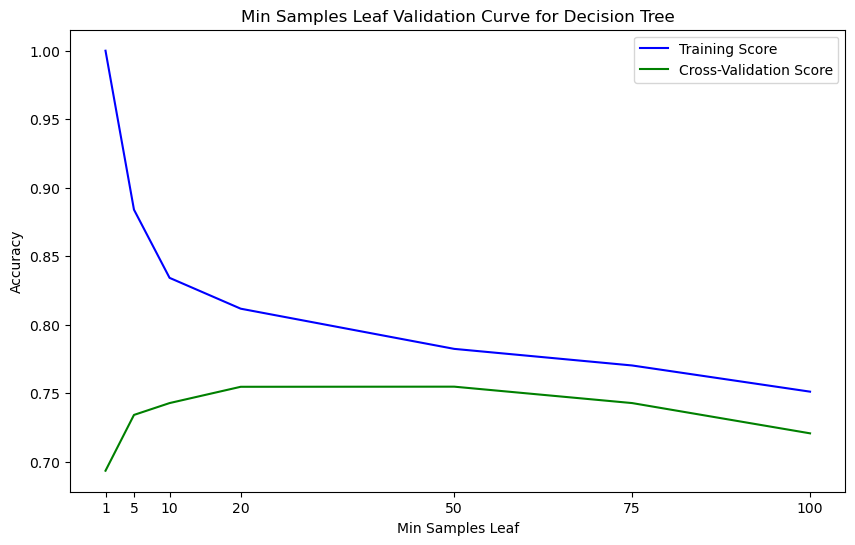

In [26]:
# Reset DT
decision_tree_clf = DecisionTreeClassifier(random_state=0)

# Create Validation Curve
min_samples_values = [1, 5, 10, 20, 50, 75, 100]
train_scores, test_scores = validation_curve(
    decision_tree_clf, 
    X_train, 
    y_train, 
    param_name="min_samples_leaf", 
    param_range=min_samples_values, 
    cv=10, 
    scoring="accuracy", 
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the Validation Curve
plt.figure(figsize=(10, 6))
plt.title('Min Samples Leaf Validation Curve for Decision Tree')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')

# Plot Scores
plt.plot(min_samples_values, train_scores_mean, label='Training Score', color='blue')
plt.plot(min_samples_values, test_scores_mean, label='Cross-Validation Score', color='green')
plt.legend(loc="best")
plt.xticks(min_samples_values)

# Find Max Score Index and Get Corresponding Value
best_min_samples_index = np.argmax(np.mean(test_scores, axis=1))
best_min_samples_leaf = min_samples_values[best_min_samples_index]
print("Best Min Samples Leaf:", best_min_samples_leaf)

# Save Plot for Report
plt.show()

Best Min Samples Split: 100


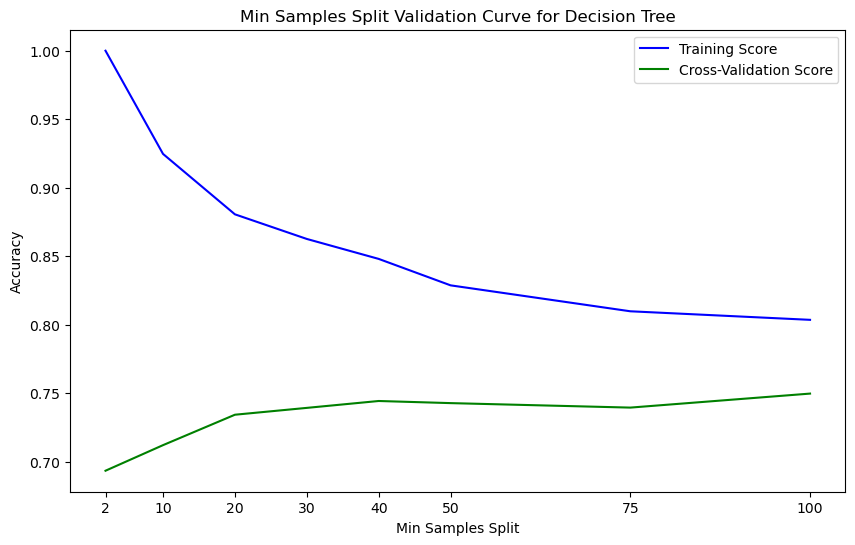

In [27]:
# Reset DT
decision_tree_clf = DecisionTreeClassifier(random_state=0)

# Create Validation Curve
min_samples_values = [2, 10, 20, 30, 40, 50, 75, 100]
train_scores, test_scores = validation_curve(
    decision_tree_clf, 
    X_train, 
    y_train, 
    param_name="min_samples_split", 
    param_range=min_samples_values, 
    cv=10, 
    scoring="accuracy", 
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the Validation Curve
plt.figure(figsize=(10, 6))
plt.title('Min Samples Split Validation Curve for Decision Tree')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')

# Plot Scores
plt.plot(min_samples_values, train_scores_mean, label='Training Score', color='blue')
plt.plot(min_samples_values, test_scores_mean, label='Cross-Validation Score', color='green')
plt.legend(loc="best")
plt.xticks(min_samples_values)

# Find Max Score Index and Get Corresponding Value
best_min_samples_index = np.argmax(np.mean(test_scores, axis=1))
best_min_samples_split = min_samples_values[best_min_samples_index]
print("Best Min Samples Split:", best_min_samples_split)

# Save Plot for Report
plt.show()

Best Max Depth: 5


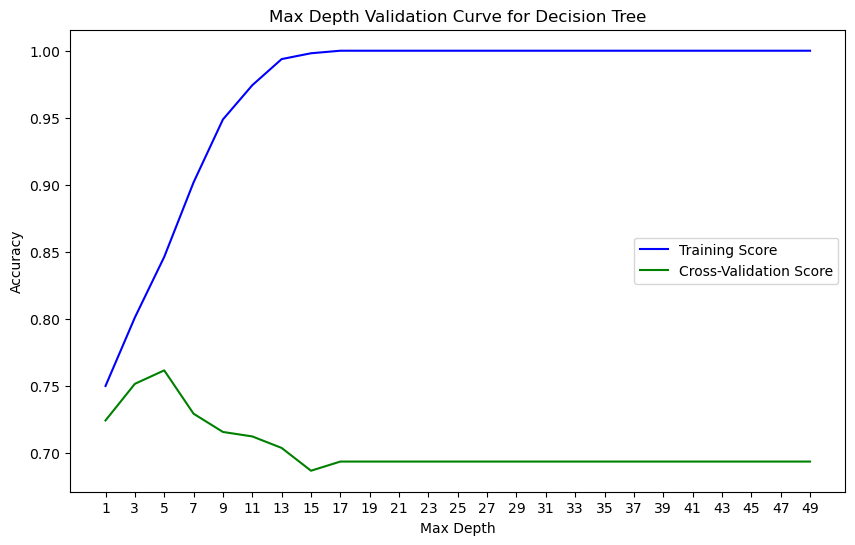

In [28]:
# Reset DT
decision_tree_clf = DecisionTreeClassifier(random_state=0)

# Create Validation Curve
max_depth_values = np.arange(1, 51, 2)
train_scores, test_scores = validation_curve(
    decision_tree_clf, 
    X_train, 
    y_train, 
    param_name="max_depth", 
    param_range=max_depth_values, 
    cv=10, 
    scoring="accuracy", 
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the Validation Curve
plt.figure(figsize=(10, 6))
plt.title('Max Depth Validation Curve for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

# Plot Scores
plt.plot(max_depth_values, train_scores_mean, label='Training Score', color='blue')
plt.plot(max_depth_values, test_scores_mean, label='Cross-Validation Score', color='green')
plt.legend(loc="best")
plt.xticks(max_depth_values)

# Find Max Score Index and Get Corresponding Value
best_max_depth_index = np.argmax(np.mean(test_scores, axis=1))
best_max_depth = max_depth_values[best_max_depth_index]
print("Best Max Depth:", best_max_depth)

# Save Plot for Report
plt.show()

gini: 0.7579777907656342
entropy: 0.744447691408533
log_loss: 0.744447691408533
gini


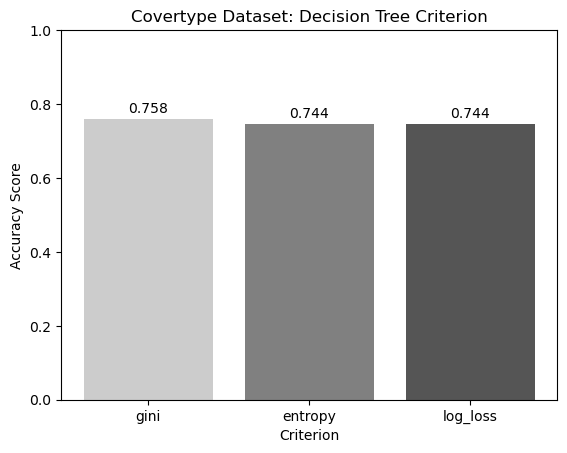

In [29]:
# Compare Criteria
criteria = ['gini', 'entropy', 'log_loss']
performance_scores = []
accuracy_scorer = make_scorer(accuracy_score)
best_score = -1
best_criteria = ''

# Save Info for Each
for criterion in criteria:
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=best_max_depth, random_state=42)
    clf.fit(X_train, y_train)
    cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=accuracy_scorer, n_jobs=-1)
    y_pred = clf.predict(X_test)
    
    # Get the Mean Validation Score on the Last Sample
    last_sample_score = np.mean(cross_val_scores)
    
    # Get this Mean
    performance = np.mean(cross_val_scores)
    print(str(criterion) + ": "+ str(performance))
    performance_scores.append(performance)
    
    # Save Best Hyperparameter Value
    if last_sample_score > best_score:
        best_score = last_sample_score
        best_criteria = criterion
        
# Print Best
print(best_criteria)

# Create Chart
plt.bar(criteria, performance_scores, color=['#CCCCCC', '#808080', '#555555'])
plt.title('Covertype Dataset: Decision Tree Criterion')
plt.xlabel('Criterion')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
for i, performance in enumerate(performance_scores):
    plt.text(i, performance + 0.01, f'{performance:.3f}', ha='center', va='bottom')
# plt.savefig('Covertype_DT_VC_Criterion.png')
plt.show()

In [30]:
# Use Sklearn
classifier = DecisionTreeClassifier(random_state=0, 
                                   criterion=best_criteria,
                                   max_depth=best_max_depth,
                                   min_samples_split=best_min_samples_split,
                                   min_samples_leaf=best_min_samples_leaf)

# Train
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

# Test
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy on Tuned: {accuracy*100:.2f}%")

Training Accuracy: 79.05%
Test Accuracy on Tuned: 80.30%


In [31]:
X_combined = np.vstack((X_train.values, X_test.values))  # Convert DataFrame to NumPy array and stack
y_combined = np.hstack((y_train, y_test))  # Combine labels
y_pred_combined = np.hstack((y_train_pred, y_pred))
is_test = np.hstack((np.zeros(len(X_train)), np.ones(len(X_test))))
column_names = X_train.columns
df_X_combined = pd.DataFrame(X_combined, columns=column_names)
df_y_combined = pd.DataFrame({
    'actual': y_combined,
    'predicted': y_pred_combined,
    'is_test': is_test
})
df_combined = pd.concat([df_X_combined, df_y_combined], axis=1)
print(df_combined.head())

      speed  outreach_ratio  mean_acceleration  distance_traveled  cluster  \
0  5.685658        0.091999           0.359992        2120.843568      6.0   
1  1.284351        0.277433           0.199595         904.329060      6.0   
2  1.357269        0.204141           0.130170        4665.668347      8.0   
3  4.808747        0.101014           0.418331        8253.542556      3.0   
4  3.796143        0.029767           0.380977        3060.875314      2.0   

   actual  predicted  is_test  
0       0          0      0.0  
1       0          0      0.0  
2       1          0      0.0  
3       1          1      0.0  
4       0          0      0.0  


In [32]:
y_actual = df_combined['actual']
y_predicted = df_combined['predicted']
accuracy = accuracy_score(y_actual, y_predicted)
print(f"Combined Accuracy (DONT USE): {accuracy*100:.2f}%")

Combined Accuracy (DONT USE): 79.17%


In [33]:
test_count = df_combined['is_test'].sum()
print(f"Number of test samples: {test_count}")

train_count = len(df_combined) - test_count
print(f"Number of training samples: {train_count}")

Number of test samples: 66.0
Number of training samples: 587.0


### 8. Dump DT

In [34]:
# Re-init
classifier = DecisionTreeClassifier(random_state=0, 
                                   criterion=best_criteria,
                                   max_depth=best_max_depth,
                                   min_samples_split=best_min_samples_split,
                                   min_samples_leaf=best_min_samples_leaf)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       random_state=0)

In [35]:
# Imports
from sklearn.tree import export_graphviz

# Copy Results to Viewer like https://dreampuf.github.io/GraphvizOnline
feature_names = X_train.columns.tolist()
#export_graphviz(classifier, feature_names=feature_names, out_file='decision_tree_disincludeIDs.dot')

In [36]:
# Print X_train for Reference
print(X_train)

        speed  outreach_ratio  mean_acceleration  distance_traveled  cluster
577  5.685658        0.091999           0.359992        2120.843568        6
633  1.284351        0.277433           0.199595         904.329060        6
357  1.357269        0.204141           0.130170        4665.668347        8
165  4.808747        0.101014           0.418331        8253.542556        3
611  3.796143        0.029767           0.380977        3060.875314        2
..        ...             ...                ...                ...      ...
71   4.469454        0.203392           0.302483        2615.042270        2
106  6.848159        0.132124           0.575422        9637.132413        9
270  3.656903        0.747736           0.223323        1204.035349        6
435  5.095371        0.219034           0.498550        5763.261859        0
102  3.889388        0.408020           0.327125        2084.076719        6

[587 rows x 5 columns]


[Text(0.6538461538461539, 0.9166666666666666, 'mean_acceleration <= 0.384\ngini = 0.46\nsamples = 587\nvalue = [376.0, 211.0]'),
 Text(0.46153846153846156, 0.75, 'distance_traveled <= 5393.645\ngini = 0.378\nsamples = 466\nvalue = [348, 118]'),
 Text(0.3076923076923077, 0.5833333333333334, 'mean_acceleration <= 0.316\ngini = 0.239\nsamples = 260\nvalue = [224, 36]'),
 Text(0.23076923076923078, 0.4166666666666667, 'distance_traveled <= 4332.171\ngini = 0.167\nsamples = 196\nvalue = [178, 18]'),
 Text(0.15384615384615385, 0.25, 'outreach_ratio <= 0.254\ngini = 0.118\nsamples = 143\nvalue = [134, 9]'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.071\nsamples = 81\nvalue = [78, 3]'),
 Text(0.23076923076923078, 0.08333333333333333, 'gini = 0.175\nsamples = 62\nvalue = [56, 6]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.282\nsamples = 53\nvalue = [44, 9]'),
 Text(0.38461538461538464, 0.4166666666666667, 'gini = 0.404\nsamples = 64\nvalue = [46, 18]'),
 Text(0.6153846153846154,

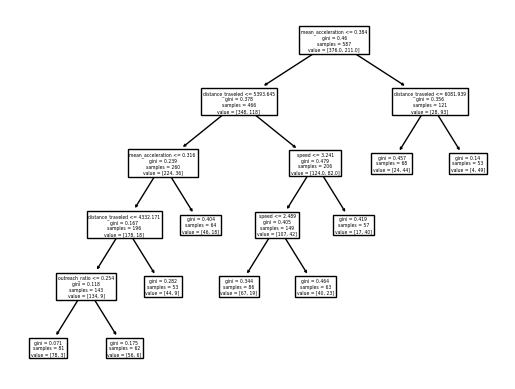

In [37]:
# Imports
from sklearn.tree import plot_tree

decision_tree_clf = DecisionTreeClassifier(random_state=0, 
                                   criterion=best_criteria,
                                   max_depth=best_max_depth,
                                   min_samples_split=best_min_samples_split,
                                   min_samples_leaf=best_min_samples_leaf)
decision_tree_clf.fit(X_train, y_train)

# Visualize Here
feature_names = X_train.columns.tolist()
plot_tree(decision_tree_clf, feature_names=feature_names)

In [38]:
# Explain with Words
# Source: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
decision_tree_clf = DecisionTreeClassifier(random_state=0, 
                                   criterion=best_criteria,
                                   max_depth=best_max_depth,
                                   min_samples_split=best_min_samples_split,
                                   min_samples_leaf=best_min_samples_leaf)
decision_tree_clf.fit(X_train, y_train)
clf = decision_tree_clf
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 17 nodes and has the following tree structure:

node=0 is a split node with value=[[0.64054514 0.35945486]]: go to node 1 if X[:, 2] <= 0.3841192424297333 else to node 14.
	node=1 is a split node with value=[[0.74678112 0.25321888]]: go to node 2 if X[:, 3] <= 5393.645263671875 else to node 9.
		node=2 is a split node with value=[[0.86153846 0.13846154]]: go to node 3 if X[:, 2] <= 0.31634092330932617 else to node 8.
			node=3 is a split node with value=[[0.90816327 0.09183673]]: go to node 4 if X[:, 3] <= 4332.1708984375 else to node 7.
				node=4 is a split node with value=[[0.93706294 0.06293706]]: go to node 5 if X[:, 1] <= 0.25399942696094513 else to node 6.
					node=5 is a leaf node with value=[[0.96296296 0.03703704]].
					node=6 is a leaf node with value=[[0.90322581 0.09677419]].
				node=7 is a leaf node with value=[[0.83018868 0.16981132]].
			node=8 is a leaf node with value=[[0.71875 0.28125]].
		node=9 is a split node with value=[[0.6019417

### 9. Check DT using Rules Learned

In [39]:
# Ensure the columns are numeric, coercing errors
X_train['mean_acceleration'] = pd.to_numeric(X_train['mean_acceleration'], errors='coerce')
X_train['distance_traveled'] = pd.to_numeric(X_train['distance_traveled'], errors='coerce')
X_train['speed'] = pd.to_numeric(X_train['speed'], errors='coerce')

X_test['mean_acceleration'] = pd.to_numeric(X_test['mean_acceleration'], errors='coerce')
X_test['distance_traveled'] = pd.to_numeric(X_test['distance_traveled'], errors='coerce')
X_test['speed'] = pd.to_numeric(X_test['speed'], errors='coerce')

# Drop rows with NaN values (optional)
X_train = X_train.dropna()
X_test = X_test.dropna()

# Ensure corresponding y values are also dropped
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

# Define the prediction function
def predict_gender_2(mean_acceleration, distance_traveled, speed):
    if mean_acceleration > 0.38412:
        return 'male'
    elif distance_traveled <= 5393.64526:
        return 'female'
    elif mean_acceleration <= 0.38412 and distance_traveled > 5393.64526 and speed <= 3.24055:
        return 'female'
    else:
        return 'male'

# Apply the decision rules to the training and test sets
y_pred_train_2 = X_train.apply(lambda row: predict_gender_2(row['mean_acceleration'], row['distance_traveled'], row['speed']), axis=1)
y_pred_test_2 = X_test.apply(lambda row: predict_gender_2(row['mean_acceleration'], row['distance_traveled'], row['speed']), axis=1)

# Map categorical predictions to numeric labels
label_mapping_2 = {'male': 1, 'female': 0}
y_pred_train_numeric_2 = y_pred_train_2.map(label_mapping_2)
y_pred_test_numeric_2 = y_pred_test_2.map(label_mapping_2)

# Calculate accuracy
train_accuracy_2 = accuracy_score(y_train, y_pred_train_numeric_2)
test_accuracy_2 = accuracy_score(y_test, y_pred_test_numeric_2)

print(f"Train Accuracy: {train_accuracy_2 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy_2 * 100:.2f}%")

Train Accuracy: 79.05%
Test Accuracy: 80.30%


In [40]:
# Confirm Exclusions Applied
print(X_train.shape)
print(X_test.shape)

(587, 5)
(66, 5)


### 10. Run Metrics, Script from Bree

In [41]:
"""
Created on Mon Jun 17 18:01:44 2024

@author: breannashi
"""

class Metrics:
    """
    A class to calculate various metrics for binary classification.

    Attributes:
        label (array-like): Ground truth binary labels.
        predict (array-like): Predicted binary labels.
        tp (int): True Positives.
        tn (int): True Negatives.
        fp (int): False Positives.
        fn (int): False Negatives.
        total (int): Total number of samples.
        pp (float): Proportion of positive samples.
        pn (float): Proportion of negative samples.
        tpr (float): True Positive Rate (Sensitivity).
        tnr (float): True Negative Rate (Specificity).
        fpr (float): False Positive Rate.
        fnr (float): False Negative Rate.
        acc (float): Accuracy.
        pprecision (float): Positive Precision.
        nprecision (float): Negative Precision.
        precall (float): Positive Recall.
        nrecall (float): Negative Recall.
        pFm (float): Positive F-measure.
        nFm (float): Negative F-measure.
        bacc (float): Balanced Accuracy.
        mcc (float): Matthews Correlation Coefficient.
    """
    def __init__(self, label, predict):
        """
        Initialize the Metrics class with ground truth labels and predictions.

        Parameters:
            label (array-like): Ground truth binary labels.
            predict (array-like): Predicted binary labels.
        """
        print('label=1 is positive, label=0 is negative')
        self.label=label
        self.predict=predict

        self.tp = np.sum((self.label == 1) & (self.predict == 1))
        self.tn = np.sum((self.label == 0) & (self.predict == 0))
        self.fp = np.sum((self.label == 0) & (self.predict == 1))
        self.fn = np.sum((self.label == 1) & (self.predict == 0))

        # Rates
        self.total=self.tp+self.tn+self.fp+self.fn
        self.pp=(self.tp+self.fn)/self.total
        self.pn=(self.tn+self.fp)/self.total
        self.tpr=self.tp/(self.tp+self.fn)
        self.tnr=self.tn/(self.tn+self.fp)
        self.fpr=self.fp/(self.tn+self.fp)
        self.fnr=self.fn/(self.tp+self.fn)

        # General Metrics
        self.acc=(self.tp+self.tn)/self.total
        self.pprecision=self.tp/(self.tp+self.fp)
        self.nprecision=self.tn/(self.tn+self.fn)
        self.precall=self.tpr
        self.nrecall=self.tnr
        self.pFm=2*(self.tp)/(2*self.tp+self.tn+self.fp)
        self.nFm=2*(self.tn)/(2*self.tn+self.tp+self.fn)
        
        # For Unbalanced Datasets
        self.bacc=0.5*(self.tpr+self.tnr)
        self.mcc=(self.tp*self.tn-self.fp*self.fn)/np.sqrt((self.tp+self.fp)*(self.tp+self.fn)*(self.tn+self.fp)*(self.tn+self.fn))

In [42]:
label = y_test
predict = y_pred
metrics = Metrics(label, predict)

print("True Positives:", metrics.tp)
print("True Negatives:", metrics.tn)
print("False Positives:", metrics.fp)
print("False Negatives:", metrics.fn)
print("Accuracy:", metrics.acc)
print("Positive Precision:", metrics.pprecision)
print("Negative Precision:", metrics.nprecision)
print("Positive Recall:", metrics.precall)
print("Negative Recall:", metrics.nrecall)
print("Balanced Accuracy:", metrics.bacc)
print("Matthews Correlation Coefficient:", metrics.mcc)

label=1 is positive, label=0 is negative
True Positives: 19
True Negatives: 34
False Positives: 8
False Negatives: 5
Accuracy: 0.803030303030303
Positive Precision: 0.7037037037037037
Negative Precision: 0.8717948717948718
Positive Recall: 0.7916666666666666
Negative Recall: 0.8095238095238095
Balanced Accuracy: 0.8005952380952381
Matthews Correlation Coefficient: 0.5882042694939653
